# Introdução à Otimização e à Fronteira Eficiente

## Combinação de dois ativos

* Retorno Combinado

$$R(w_A, w_B) = w_A \times R_A + w_B \times R_B$$

* Volatilizade Combinada

$$\sigma^2(w_A, w_B) = \sigma^2_A w^2_A + \sigma^2_B w^2_B + 2 w_A w_B \sigma_A \sigma_B \rho_{A,B}$$

## Fronteira Eficiente

Bibliotecas importadas

In [16]:
import pandas as pd
import risk_toolkit as rt
import matplotlib.pyplot as plt

In [17]:
plt.style.use('seaborn')

In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Leitura da base de dados

In [19]:
ind = pd.read_csv('../data/ind30_m_vw_rets.csv', header=0, index_col=0, parse_dates=True)/100
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


Correção do formato de data da coluna *index*:

In [20]:
ind.index = pd.to_datetime(ind.index, format='%Y%m').to_period('M')
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


Correção da excesso de espaços nos nomes de colunas:

In [21]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [22]:
ind.columns = ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

Leitura dos dados por uso da função personalizada

In [23]:
ind = rt.get_ind_returns()
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [24]:
ind.shape

(1110, 30)

Máximo *drawdown*

<AxesSubplot:title={'center':'Drawdown para o segmento Food'}>

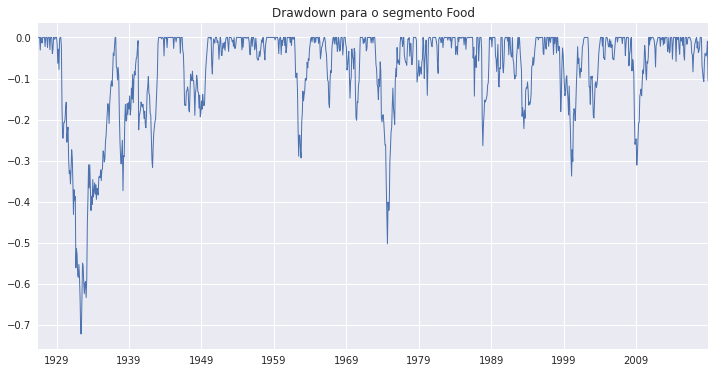

In [25]:
rt.drawdown(ind['Food'])['Drawdown'].plot.line(
    title='Drawdown para o segmento Food',
    figsize=(12,6),
    lw=1
)

Cálculo do Valor em Risco ($VaR$) modificado (Cornish-Fisher) para alguns segmentos.

In [26]:
cols_of_interest = ['Food', 'Smoke', 'Coal', 'Beer', 'Fin']
rt.var_gaussian(ind[cols_of_interest], modified=True)

Food     0.061211
Smoke    0.080292
Coal     0.064981
Beer     0.042306
Fin      0.075875
dtype: float64

In [28]:
rt.var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.095109
Meals    0.098712
BusEq    0.099491
Games    0.102076
Mines    0.102847
dtype: float64

<AxesSubplot:title={'center':'Valor em Risco $VaR$ - Cornish-Fisher'}, ylabel='Segmento'>

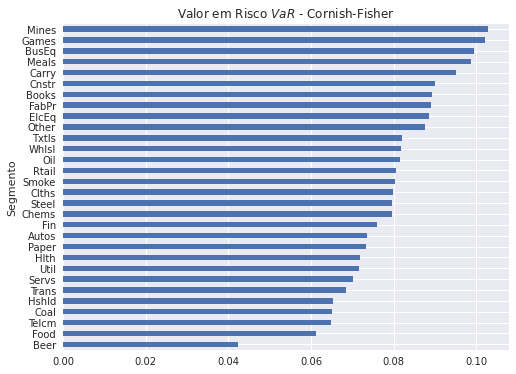

In [37]:
rt.var_gaussian(ind, modified=True).sort_values().plot.barh(
    title='Valor em Risco $VaR$ - Cornish-Fisher',
    ylabel='$VaR$',
    xlabel='Segmento',
    figsize=(8,6)
)

Índice de Sharpe para os segmentos de mercado

<AxesSubplot:title={'center':'Índice de Sharpe para os segmentos de mercado durante o período de 1926-2018'}, xlabel='Segmento', ylabel='Índice de Sharpe'>

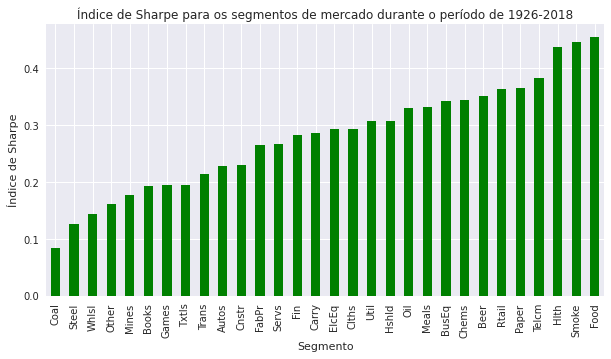

In [53]:
rt.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(
    title='Índice de Sharpe para os segmentos de mercado durante o período de 1926-2018',
    xlabel='Segmento',
    ylabel='Índice de Sharpe',
    figsize=(10,5),
    color='green'
)

<AxesSubplot:title={'center':'Índice de Sharpe para os segmentos de mercado durante o período de 2000-2018'}, xlabel='Segmento', ylabel='Índice de Sharpe'>

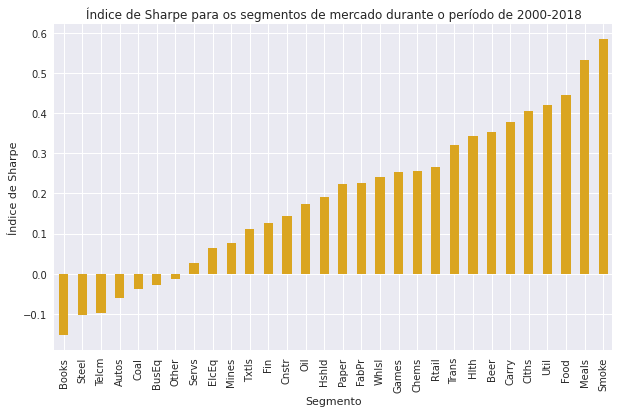

In [49]:
rt.sharpe_ratio(ind['2000':], 0.03, 12).sort_values().plot.bar(
    title='Índice de Sharpe para os segmentos de mercado durante o período de 2000-2018',
    xlabel='Segmento',
    ylabel='Índice de Sharpe',
    figsize=(10,6),
    color='goldenrod'
)

Retornos esperados entre 1995 e 2000

<AxesSubplot:title={'center':'Retornos esperados no período de 1995 a 2000'}, xlabel='Retorno Esperado $E[R]$', ylabel='Segmento'>

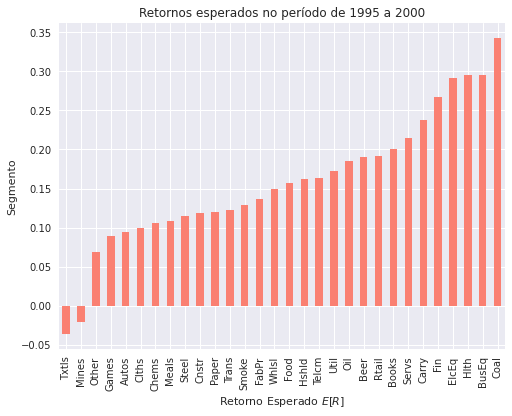

In [60]:
er = rt.annualize_rets(ind['1995':'2000'], 12)
er .sort_values().plot.bar(
    title='Retornos esperados no período de 1995 a 2000',
    xlabel='Retorno Esperado $E[R]$',
    ylabel='Segmento',
    figsize=(8,6),
    color='salmon'
)

Matriz de covariância entre os segmentos de mercado

In [61]:
cov = ind['1995':'2000'].cov()
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668
